In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load data
df = pd.read_csv("../data/raw/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Data info
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.replace("?", np.nan, inplace=True)
df = df.astype(float)


In [7]:
df.fillna(df.median(), inplace=True)

In [8]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
df["sex"] = df["sex"].astype(int)
df["cp"] = df["cp"].astype(int)
df["fbs"] = df["fbs"].astype(int)
df["restecg"] = df["restecg"].astype(int)
df["exang"] = df["exang"].astype(int)
df["slope"] = df["slope"].astype(int)
df["ca"] = df["ca"].astype(int)
df["thal"] = df["thal"].astype(int)


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


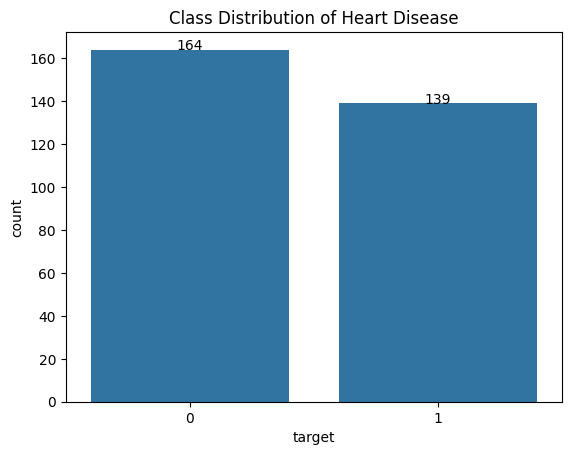

In [20]:
# sns.countplot(x="target", data=df)
# plt.title("Class Distribution of Heart Disease")
# plt.savefig("../screenshots/class_balance.png")
# plt.show()
ax = sns.countplot(x="target", data=df)
plt.title("Class Distribution of Heart Disease")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            '{:1.0f}'.format(height),
            ha="center")

plt.savefig("../screenshots/class_balance.png")
plt.show()

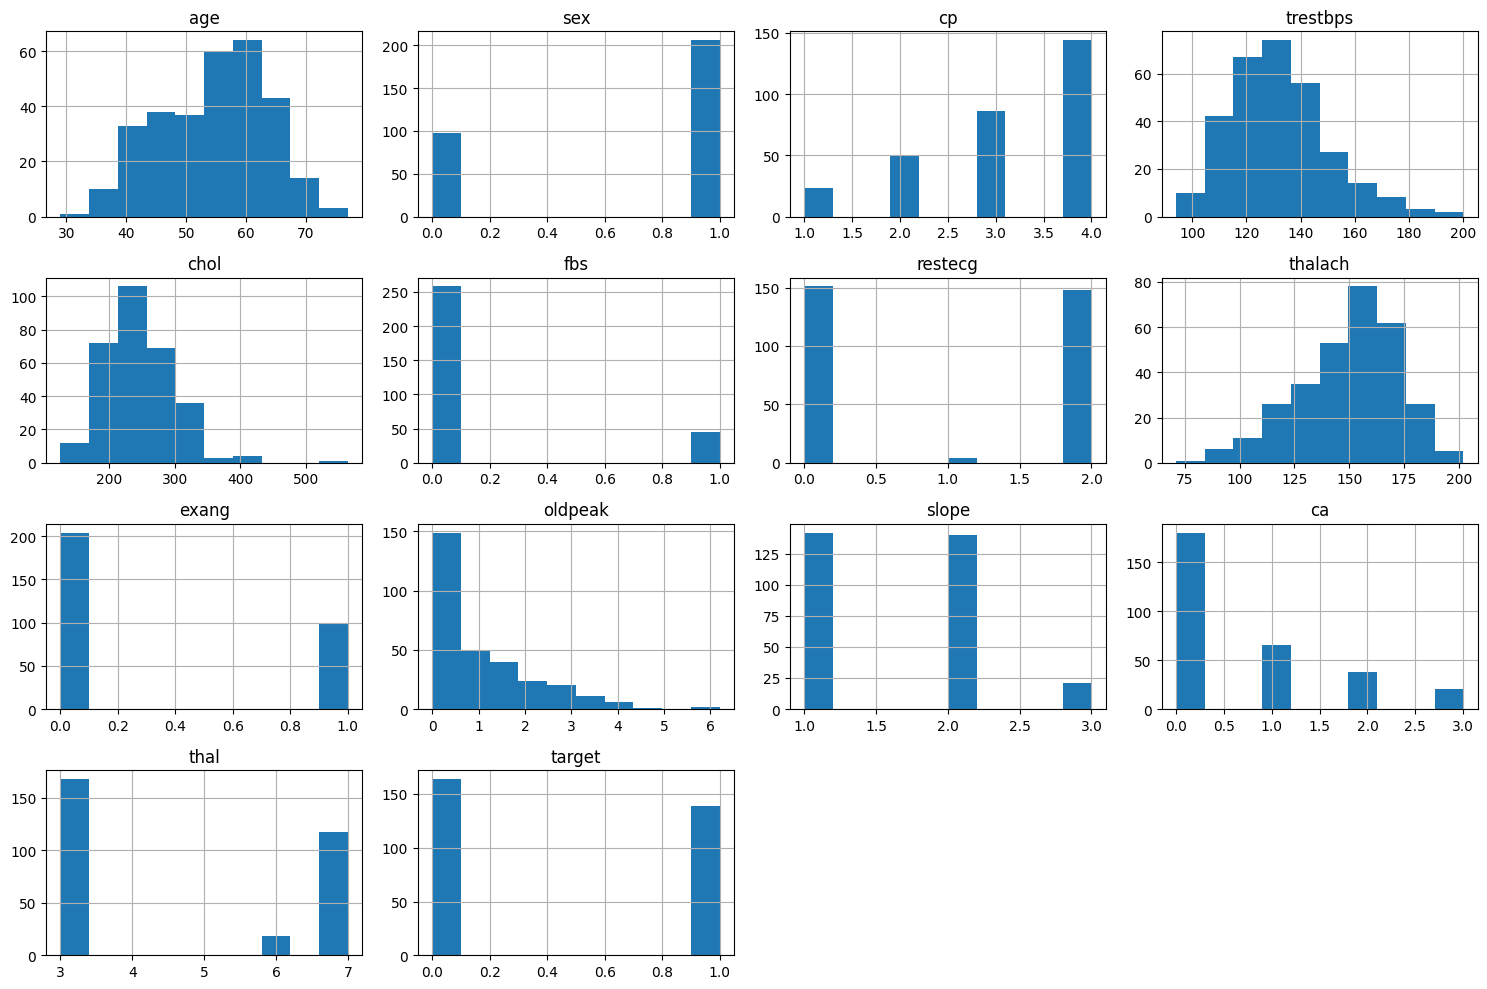

In [19]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.savefig("../screenshots/feature_distributions.png")
plt.show()

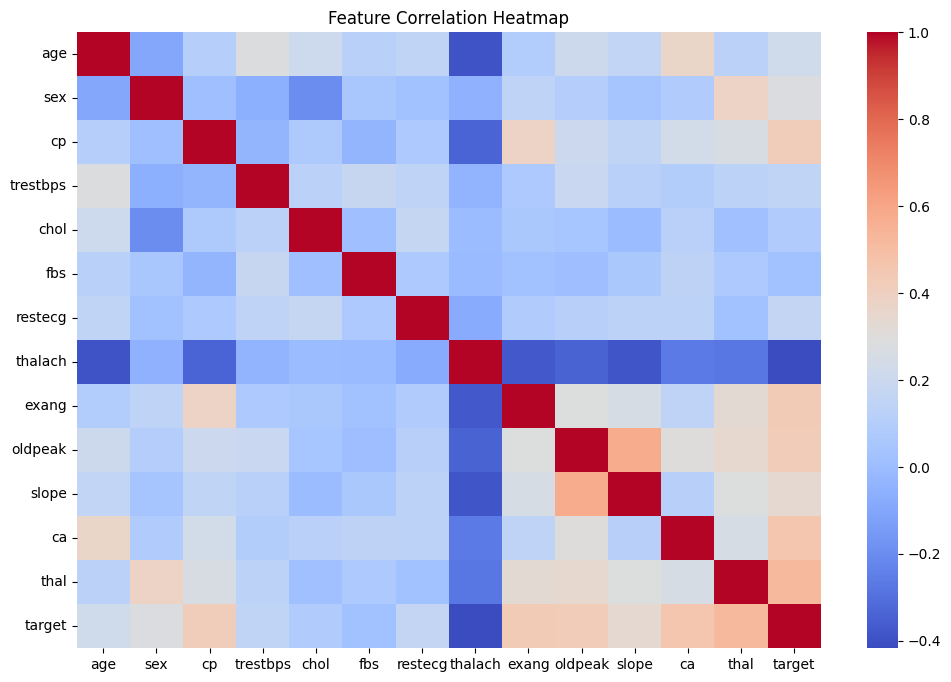

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("../screenshots/correlation_heatmap.png")
plt.show()

In [17]:
df.to_csv("../data/processed/heart_disease_cleaned.csv", index=False)
